# Factors that impact the Trips by bikes

## Dataset Overview

 my data set(fordgobike-tripdata) contains :183412(ROWS) bike trips with 16(COLUMNS) variables on bike trips, including start_time , end_time , start_station_id , bike_id , start_station_latitude ,start_station_longitude , end_station_latitude , end_station_longitude , bike_id, .......etc.


## Investigation Overview

In this investigation, I wanted to look at the factors or features that affect trips by bikes, and customer to target. 
The main focus was on the some of the variables like:                              
**duration_sec**  ,	**start_station_name**  ,	**end_station_name**  ,	**user_type**	 ,  **member_gender**  ,	**bike_share_for_all_trip	member_age** ,	 **duration_sec_log**.

## Summary and Insights

*  Subscribers tend to take bike trips more than Customers:                           
   subscribers rate(**90.6**) vs. Customer rate(**9.4**).


*  Males tend to take bike trips more than Female:                                    
   Males rate(**76.2**) vs. Females rate(**23.8**).


* bike share for all trip                                
   yes rate(**90.3**) vs. no rate(**9.7**).

*  Most travellers ages lies between 20 to 40 years old.


*  Most travels Duration in seconds   are around 698 sec.

*  Of Course from the previous visualization, Males tend to travel by bike more than Female, so it isn't surprising that the men ratio is more.
both genders tend to be Subsicbers more than customers.


*  Subscribers may by small ratio accept sharing, but Customers refuse to share 


*  Males and Females accept to share by very small ratio, and female ratio to accept sharing is fewer men ratio. So female tend for sharing is a very small ratio 

*  Surprisingly, younger people prefer shorter time tripes.

*  The mean age of Males and Females almost equal in age.
*  Mean age of Males and Females almost equal in preferring the same travel duration
*  The mean of customers tends to take more travel duration than Subscribers 
*  younger people tend to accept sharing more than older people.

*  Customer reject sharing.
*  Subscribers shars and reject sharing 


#Importing Liberaires


In [ ]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

In [ ]:

# Becaues I'm using google colab i'm goona using this extra lines of code
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Importing my data-set

In [ ]:
mydata = pd.read_csv('/content/gdrive/MyDrive/Data Folder /201902-fordgobike-tripdata.csv')
mydata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
mydata.shape

(183412, 16)

# Data Wrangling

### Handling Missing Values

In [ ]:
# Check for missing data _ data types
mydata.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [ ]:
# i will drope rows with missing values as they in id column, station name 
# so they wont affect my data
# as well, i will drope member_birthay and gender column
mydata.dropna(inplace=True)

### Handling Duplicate, it seems no duplicated values

In [ ]:
mydata.drop_duplicates(inplace=True)

In [ ]:
mydata.shape

(174952, 16)

### Gender Column preprocessing

In [ ]:
mydata['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [ ]:
# I will remove 'other' rows
mydata.drop(mydata.index[mydata['member_gender'] == 'Other'], inplace = True)

In [ ]:
mydata['member_gender'].unique()

array(['Male', 'Female'], dtype=object)

# Columns of interest
I will drope some of columns that i'm not interested in such as :                  
start_time , end_time , start_station_id , bike_id , start_station_latitude ,start_station_longitude	, end_station_latitude	, end_station_longitude , bike_id	

In [ ]:
mydata.drop(['start_time','end_time','start_station_id','bike_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id'], axis = 1 ,inplace=True)


In [ ]:
mydata.head(2)

,duration_sec,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No


### I WILL replace member_birth_year with the age of the traVELLER 

In [ ]:
mydata['Current_year'] = 2021.0

In [ ]:
mydata['member_age'] = mydata['Current_year'] - mydata['member_birth_year']

In [ ]:
mydata.head(1)

,duration_sec,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Current_year,member_age
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,2021.0,37.0


In [ ]:
# I will remove member_birth_year and Current_ year 
# As I have member_age 
mydata.drop(['Current_year','member_birth_year'], axis = 1 ,inplace=True)
mydata.head(1)

,duration_sec,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,37.0


# Univariate Exploration

## I will start by **Categorical Variables**

In [ ]:
mydata['user_type'].value_counts()

Subscriber    155189
Customer       16116
Name: user_type, dtype: int64

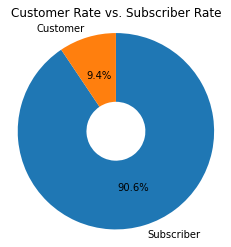

In [ ]:
sorted_counts = mydata['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.7}, autopct   = '%.1f%%');
plt.title("Customer Rate vs. Subscriber Rate");
plt.axis('square');

In [ ]:
mydata['member_gender'].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

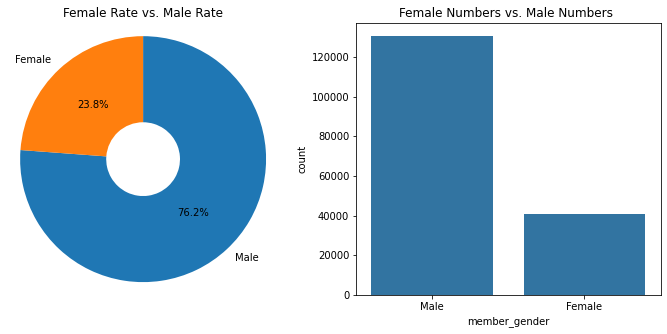

In [ ]:
plt.figure(figsize = [12, 5]);

# Left plot: pie chart with proportional data
plt.subplot(1, 2, 1);
sorted_counts = mydata['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.7}, autopct   = '%.1f%%');
plt.title("Female Rate vs. Male Rate");
plt.axis('square');

# Right plot: Histogram with real data 
plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
plt.title("Female Numbers vs. Male Numbers ")
sb.countplot(data = mydata, x = 'member_gender', color = base_color,
             order = mydata['member_gender'].value_counts().index );

In [ ]:
mydata['bike_share_for_all_trip'].value_counts()

No     154607
Yes     16698
Name: bike_share_for_all_trip, dtype: int64

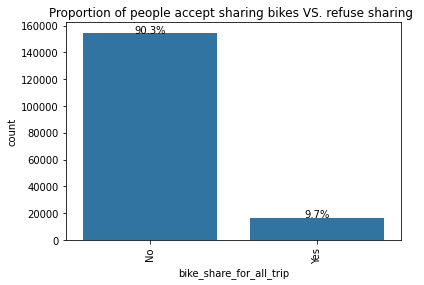

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
type_count=mydata['bike_share_for_all_trip'].value_counts()
type_order = type_count.index
sums=mydata['bike_share_for_all_trip'].value_counts().sum()

sb.countplot(data=mydata, x='bike_share_for_all_trip', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = mydata['bike_share_for_all_trip'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/sums)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4
plt.title('Proportion of people accept sharing bikes VS. refuse sharing ');

## Insights with categorical variables analysis

*  Subscribers tend to take bike trips more than Customers:                           
   subscribers rate(**90.6**) vs. Customer rate(**9.4**).


*  Males tend to take bike trips more than Female:                                    
   Males rate(**76.2**) vs. Females rate(**23.8**).


* bike share for all trip                                
   yes rate(**90.3**) vs. no rate(**9.7**).


## secondly  **Quanlitative Variables**

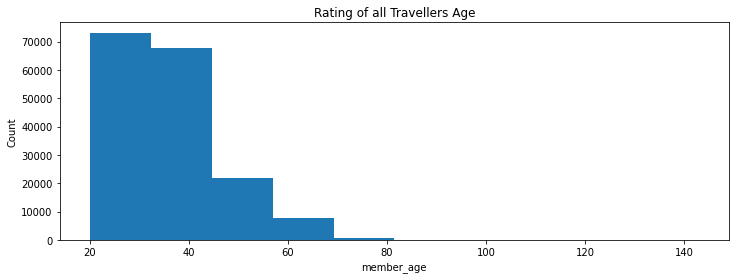

In [ ]:
plt.hist(data = mydata, x = 'member_age');
plt.xlabel('member_age');
plt.ylabel('Count');
plt.title("Rating of all Travellers Age");

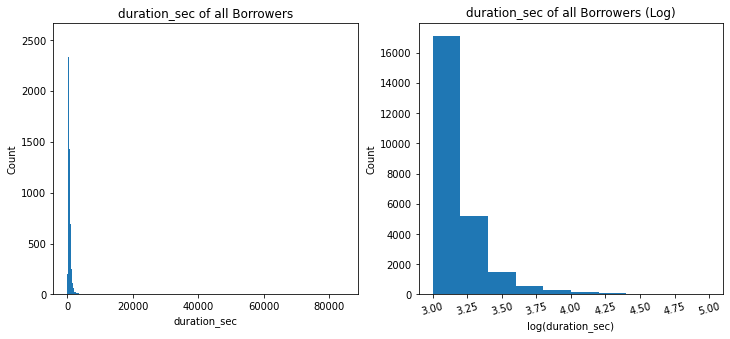

In [ ]:
plt.figure(figsize = [12,5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, mydata['duration_sec'].max()+10, 10)
plt.hist(data =mydata, x = 'duration_sec', bins = bin_edges)
plt.xlabel('duration_sec')
plt.ylabel('Count');
plt.title("duration_sec of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(mydata['duration_sec']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(duration_sec)');
plt.ylabel('Count');
plt.xticks(rotation = 15);
plt.title("duration_sec of all Borrowers (Log)");

mydata['duration_sec_log'] = np.log10(mydata['duration_sec'])

## Insights with qualitative variables analysis

*  Most travellers ages lies between 20 to 40 years old.


*  Most travels Duration in seconds   are around 698 sec.

# Bivariate Exploration

## I will start by **Categorical Variables**

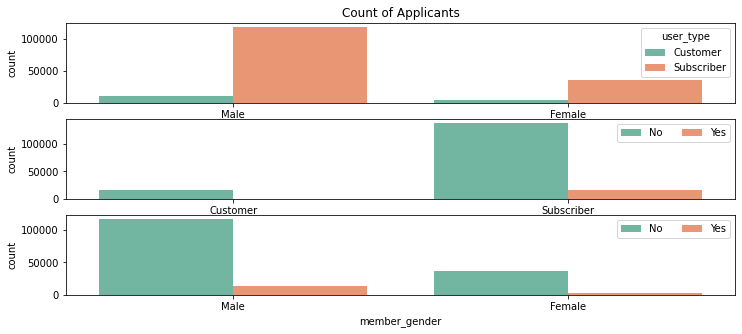

In [ ]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['member_gender', 'bike_share_for_all_trip', 'user_type']

plt.figure(figsize = [12, 5])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = mydata, x = 'member_gender', hue = 'user_type', palette = 'Set2')
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = mydata, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Set2')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = mydata, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Set2')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping


plt.show()

## Insights with categorical variables analysis

*  Of Course from the previous visualization, Males tend to travel by bike more than Female, so it isn't surprising that the men ratio is more.
both genders tend to be Subsicbers more than customers.


*  Subscribers may by small ratio accept sharing, but Customers refuse to share 


*  Males and Females accept to share by very small ratio, and female ratio to accept sharing is fewer men ratio. So female tend for sharing is a very small ratio 

##  **Quantitative Variables**

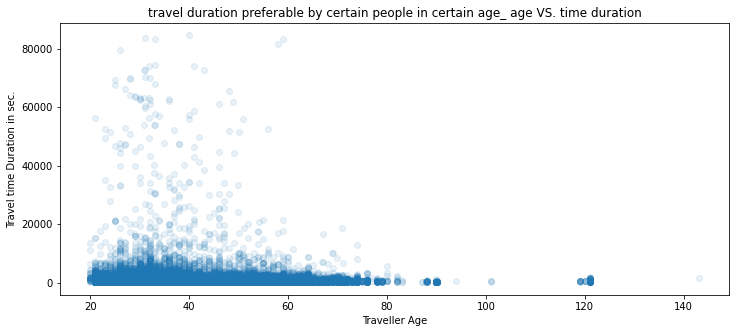

In [ ]:
plt.figure(figsize = [12, 5])

sb.regplot(data = mydata, x = 'member_age', y = 'duration_sec', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Traveller Age')
plt.ylabel('Travel time Duration in sec.');
plt.title('travel duration preferable by certain people in certain age_ age VS. time duration');


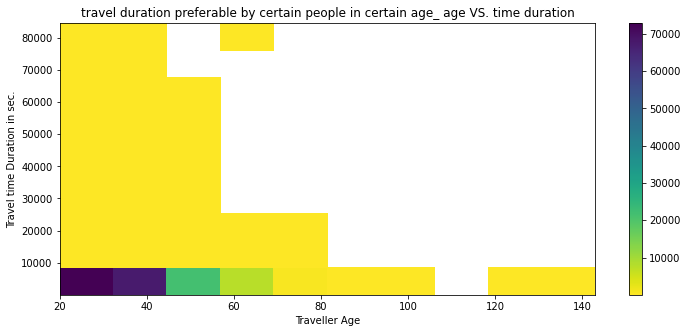

In [ ]:
plt.figure(figsize = [12, 5])

h2d = plt.hist2d(data = mydata, x = 'member_age', y = 'duration_sec', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Traveller Age')
plt.ylabel('Travel time Duration in sec.');
plt.title('travel duration preferable by certain people in certain age_ age VS. time duration');

## Insights with Quantitative variables analysis

*  Surprisingly, younger people prefer shorter time tripes.


##  **Quantitative** Variables vs **Qualitative** Variables.

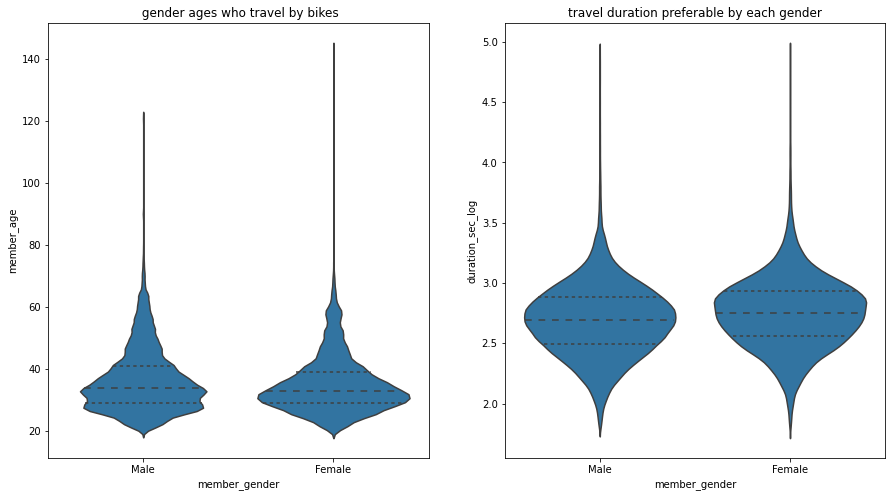

In [ ]:
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
base_color=sb.color_palette()[0]
sb.violinplot(data=mydata ,x='member_gender' ,y='member_age', color=base_color,inner='quartile' ); 
plt.title(' gender ages who travel by bikes');


# right plot: box plot
plt.subplot(1, 2, 2)
base_color=sb.color_palette()[0]
sb.violinplot(data=mydata ,x='member_gender' ,y='duration_sec_log', color=base_color,inner='quartile' ); 
plt.title('travel duration preferable by each gender');

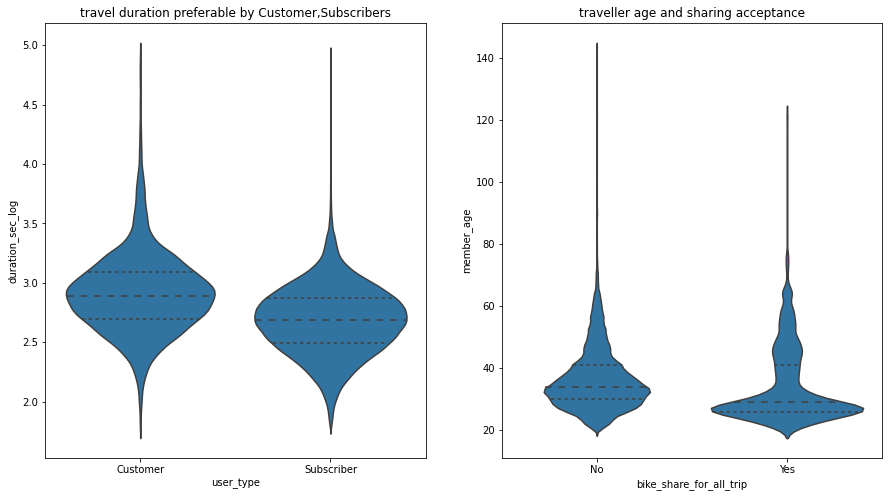

In [ ]:
plt.figure(figsize = [15, 8])

# right plot: box plot
plt.subplot(1, 2, 1)
base_color=sb.color_palette()[0]
sb.violinplot(data=mydata ,x='user_type' ,y='duration_sec_log', color=base_color,inner='quartile' ); 
plt.title('travel duration preferable by Customer,Subscribers');


# right plot: box plot
plt.subplot(1, 2, 2)
base_color=sb.color_palette()[0]
sb.violinplot(data=mydata ,x='bike_share_for_all_trip' ,y='member_age', color=base_color,inner='quartile' ); 
plt.title('traveller age and sharing acceptance');

## Insights from   **Quantitative** Variables vs **Qualitative** Variables.

*  1. The mean age of Males and Females almost equal in age.
*  2. Mean age of Males and Females almost equal in preferring the same travel duration
*  3. The mean of customers tends to take more travel duration than Subscribers 
*  4. younger people tend to accept sharing more than older people.

# Multivariate Exploration

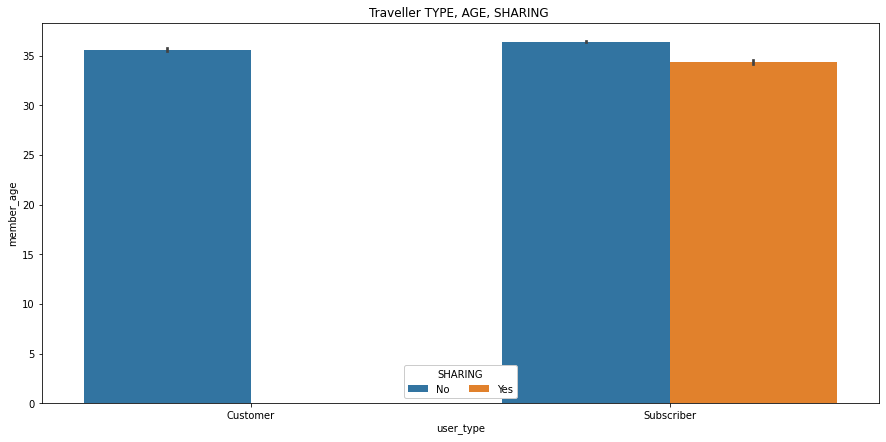

In [ ]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = mydata, x = 'user_type', y = 'member_age', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'SHARING')
plt.title('Traveller TYPE, AGE, SHARING ');

## Insights from the multivariate exploration data

*  1. Customer reject sharing.
*  2. Subscribers shars and reject sharing 
